<a href="https://colab.research.google.com/github/jihyoung-lee/AI-study/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-08-21 13:49:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   128MB/s    in 0.5s    

2021-08-21 13:49:14 (128 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# 기본경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.0.jpg', 'cat.513.jpg', 'cat.851.jpg', 'cat.805.jpg', 'cat.583.jpg']
['dog.925.jpg', 'dog.90.jpg', 'dog.789.jpg', 'dog.435.jpg', 'dog.143.jpg']


In [6]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


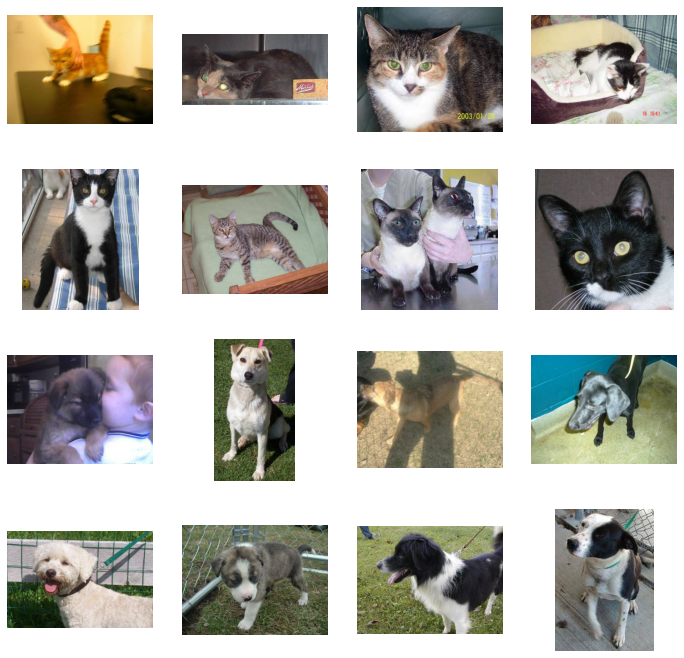

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
# 이미지 데이터 전처리하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#우선 ImageDataGenerator 객체의 rescale 파라미터를 이용해서 모든 데이터를 255로 나누어준 다음,
#flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만듭니다.
train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=10,
                    epochs=10,
                    validation_steps=10,
                    verbose=2)

Epoch 1/10
10/10 - 1s - loss: 0.6929 - accuracy: 0.5600 - val_loss: 0.6982 - val_accuracy: 0.4850
Epoch 2/10
10/10 - 1s - loss: 0.7180 - accuracy: 0.5550 - val_loss: 0.6728 - val_accuracy: 0.5500
Epoch 3/10
10/10 - 1s - loss: 0.7388 - accuracy: 0.5850 - val_loss: 0.6882 - val_accuracy: 0.5450
Epoch 4/10
10/10 - 1s - loss: 0.6608 - accuracy: 0.6050 - val_loss: 0.6361 - val_accuracy: 0.6650
Epoch 5/10
10/10 - 1s - loss: 0.6843 - accuracy: 0.6200 - val_loss: 0.6754 - val_accuracy: 0.5300
Epoch 6/10
10/10 - 1s - loss: 0.6727 - accuracy: 0.6350 - val_loss: 0.6872 - val_accuracy: 0.5650
Epoch 7/10
10/10 - 1s - loss: 0.6630 - accuracy: 0.6050 - val_loss: 0.6314 - val_accuracy: 0.6250
Epoch 8/10
10/10 - 1s - loss: 0.7255 - accuracy: 0.5850 - val_loss: 0.6361 - val_accuracy: 0.6500
Epoch 9/10
10/10 - 1s - loss: 0.5950 - accuracy: 0.7050 - val_loss: 0.7649 - val_accuracy: 0.6100
Epoch 10/10
10/10 - 1s - loss: 0.6861 - accuracy: 0.5900 - val_loss: 0.6142 - val_accuracy: 0.7200


In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + "는 강아지")
  else:
    print(fn + "는 고양이")

Saving KakaoTalk_20210821_230814893.jpg to KakaoTalk_20210821_230814893.jpg
[0.]
KakaoTalk_20210821_230814893.jpg는 고양이
